In [1]:
#import the pandas libary
import pandas as pd

# import library to handle HTTP requests
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

## Get the Top 10 Universities in the United States

In [2]:
#load top 10 Universities in USA Data
df_Universities = pd.read_html(io="https://www.worldatlas.com/articles/largest-universities-in-the-united-states.html",header=0)[0]

#check the data extraceted.
df_Universities.head(10)

,Rank,University,Location,Enrollment
0,1,University of Central Florida,"Orlando, Florida",63016
1,2,Texas A&M University,"College Station, Texas",58515
2,3,Ohio State University,"Columbus, Ohio",55508
3,4,Florida International University,"Miami, Florida",54058
4,5,University of Florida,"Gainesville, Florida",52519
5,6,Arizona State University,"Tempe, Arizona",51984
6,7,University of Texas at Austin,"Austin, Texas",50950
7,8,University of Minnesota,"Minneapolis/Saint Paul, Minnesota",50678
8,9,Michigan State University,"East Lansing, Michigan",50000
9,10,Indiana University,"Bloomington, Indiana",48514


In [3]:
# The code was removed by Watson Studio for sharing.

(10, 4)

In [4]:
!conda install -c conda-forge geopy --yes # uncomment this line if already loaded into Notebook
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge


In [ ]:
# The code was removed by Watson Studio for sharing.

In [5]:
#define a funtion to get lat/long data for each University
def getLatLon(address):
    address = address

    geolocator = Nominatim(user_agent="jac")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    return(latitude, longitude)

In [6]:
#get the lat/lon data for each university in dataframe
import time
# define the dataframe columns
column_names = ['University', 'Latitude', 'Longitude'] 

# instantiate the dataframe
df_latlon = pd.DataFrame(columns=column_names)

for row in df_Universities.iterrows():
 university = row[1][1]   
 latitude, longitude = getLatLon(university)
 #print(latitude)
 #print(longitude)
 df_latlon = df_latlon.append({'University': university, 'Latitude': latitude,'Longitude': longitude}, ignore_index=True)
 time.sleep(2)

df_latlon.head(10)

,University,Latitude,Longitude
0,University of Central Florida,28.598998,-81.197125
1,Texas A&M University,30.610837,-96.352128
2,Ohio State University,40.005709,-83.028663
3,Florida International University,25.755338,-80.376289
4,University of Florida,29.632878,-82.349013
5,Arizona State University,33.420660,-111.932635
6,University of Texas at Austin,30.284151,-97.731956
7,University of Minnesota,44.973086,-93.237088
8,Michigan State University,42.718568,-84.477916
9,Indiana University,39.869481,-84.879569


In [7]:
#update the original Universities data frame with the lat/lon data
#join dataframes
df_Universities = df_Universities.join(df_latlon.set_index('University'), on='University')

df_Universities.head(10)


,Rank,University,Location,Enrollment,Latitude,Longitude
0,1,University of Central Florida,"Orlando, Florida",63016,28.598998,-81.197125
1,2,Texas A&M University,"College Station, Texas",58515,30.610837,-96.352128
2,3,Ohio State University,"Columbus, Ohio",55508,40.005709,-83.028663
3,4,Florida International University,"Miami, Florida",54058,25.755338,-80.376289
4,5,University of Florida,"Gainesville, Florida",52519,29.632878,-82.349013
5,6,Arizona State University,"Tempe, Arizona",51984,33.420660,-111.932635
6,7,University of Texas at Austin,"Austin, Texas",50950,30.284151,-97.731956
7,8,University of Minnesota,"Minneapolis/Saint Paul, Minnesota",50678,44.973086,-93.237088
8,9,Michigan State University,"East Lansing, Michigan",50000,42.718568,-84.477916
9,10,Indiana University,"Bloomington, Indiana",48514,39.869481,-84.879569


In [8]:
# The code was removed by Watson Studio for sharing.

In [9]:
# The code was removed by Watson Studio for sharing.

In [ ]:
# The code was removed by Watson Studio for sharing.

In [10]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [ ]:
# The code was removed by Watson Studio for sharing.

In [11]:
#declare function to get the nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=1609):
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['University', 
                  'University Latitude', 
                  'University Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
#get the venue data for each university
university_venues = getNearbyVenues(names=df_Universities['University'],
                                   latitudes=df_Universities['Latitude'],
                                   longitudes=df_Universities['Longitude'])

University of Central Florida
Texas A&M University
Ohio State University
Florida International University
University of Florida
Arizona State University
University of Texas at Austin
University of Minnesota
Michigan State University
Indiana University


In [13]:
university_venues.head(10)

,University,University Latitude,University Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,University of Central Florida,28.598998,-81.197125,UCF Recreation and Wellness Center,28.595808,-81.199479,College Gym
1,University of Central Florida,28.598998,-81.197125,UCF Student Union,28.602383,-81.200166,Student Center
2,University of Central Florida,28.598998,-81.197125,Blaze Pizza,28.599014,-81.208315,Pizza Place
3,University of Central Florida,28.598998,-81.197125,Einstein Bros Bagels,28.600945,-81.199338,Bagel Shop
4,University of Central Florida,28.598998,-81.197125,Which Wich,28.602011,-81.200433,Sandwich Place
5,University of Central Florida,28.598998,-81.197125,CFE Arena,28.607224,-81.197280,College Basketball Court
6,University of Central Florida,28.598998,-81.197125,Omelet Bar,28.600142,-81.208597,Breakfast Spot
7,University of Central Florida,28.598998,-81.197125,UCF Technology Commons,28.600511,-81.200168,Electronics Store
8,University of Central Florida,28.598998,-81.197125,Bento Asian Kitchen & Sushi,28.599730,-81.208708,Asian Restaurant
9,University of Central Florida,28.598998,-81.197125,Starbucks,28.603350,-81.198927,Coffee Shop


In [14]:
#how many unique venues were identified
print('There are {} uniques categories.'.format(len(university_venues['Venue Category'].unique())))

There are 188 uniques categories.


## Define most common venue categories for each University

In [15]:
#define function to get common venue categories 
def getCommonVenues(row, num_venues):
    category = row.iloc[1:]
    category_sorted = category.sort_values(ascending=False)
    
    return category_sorted.index.values[0:num_venues]

In [16]:
#create dataframe for onehot encoding of venues
university_onehot = pd.get_dummies(university_venues[['Venue Category']], prefix="", prefix_sep="")
#this may not be required
university_onehot.drop(labels=['University'], axis=1, inplace = True)
university = university_venues['University']
university_onehot.insert(0, 'University', university)
#display the onehot dataframe
university_onehot.head()

,University,ATM,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,University of Central Florida,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,University of Central Florida,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,University of Central Florida,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,University of Central Florida,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,University of Central Florida,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
university_onehot.shape

(719, 188)

## Group by University

In [18]:
univ_grouped = university_onehot.groupby('University').mean().reset_index()
univ_grouped

,University,ATM,African Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Arizona State University,0.00,0.00,0.040000,0.000000,0.000000,0.010000,0.000000,0.010000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.000000,0.010000,0.010000
1,Florida International University,0.00,0.00,0.000000,0.000000,0.000000,0.016949,0.016949,0.016949,0.016949,...,0.000000,0.016949,0.000000,0.000000,0.016949,0.000000,0.00,0.000000,0.016949,0.000000
2,Indiana University,0.04,0.00,0.120000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,...,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.00,0.000000,0.040000,0.000000
3,Michigan State University,0.00,0.00,0.000000,0.000000,0.000000,0.018519,0.000000,0.018519,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.018519
4,Ohio State University,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010417,0.000000,0.000000,0.010417,0.010417,0.000000,0.00,0.000000,0.010417,0.000000
5,Texas A&M University,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.014706,0.000000,...,0.000000,0.000000,0.000000,0.014706,0.000000,0.029412,0.00,0.014706,0.000000,0.000000
6,University of Central Florida,0.00,0.00,0.013889,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,...,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
7,University of Florida,0.00,0.00,0.066667,0.022222,0.022222,0.000000,0.000000,0.022222,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
8,University of Minnesota,0.00,0.01,0.010000,0.000000,0.020000,0.010000,0.000000,0.030000,0.010000,...,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.010000
9,University of Texas at Austin,0.00,0.00,0.040000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.000000


In [19]:
univ_grouped = university_onehot.groupby('University').mean().reset_index()
num_top_venues = 8

for univ in univ_grouped['University']:
    print("----"+univ+"----")
    temp = univ_grouped[univ_grouped['University'] == univ].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arizona State University----
                 venue  freq
0          Pizza Place  0.08
1          Coffee Shop  0.07
2       Breakfast Spot  0.04
3  American Restaurant  0.04
4   Mexican Restaurant  0.04
5       Sandwich Place  0.04
6                  Bar  0.04
7         Burger Joint  0.03


----Florida International University----
                       venue  freq
0  Latin American Restaurant  0.10
1                   Pharmacy  0.07
2                Coffee Shop  0.07
3              Grocery Store  0.05
4         Chinese Restaurant  0.05
5                     Bakery  0.03
6                       Café  0.03
7               Burger Joint  0.03


----Indiana University----
                  venue  freq
0  Fast Food Restaurant  0.16
1   American Restaurant  0.12
2                   ATM  0.04
3          Burger Joint  0.04
4                 Hotel  0.04
5          Liquor Store  0.04
6       Motorcycle Shop  0.04
7                   Gym  0.04


----Michigan State University----
             

In [20]:
#how many venues were returned for each university?
university_venues.groupby('University').count()

,University Latitude,University Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
University,,,,,,
Arizona State University,100,100,100,100,100,100
Florida International University,59,59,59,59,59,59
Indiana University,25,25,25,25,25,25
Michigan State University,54,54,54,54,54,54
Ohio State University,96,96,96,96,96,96
Texas A&M University,68,68,68,68,68,68
University of Central Florida,72,72,72,72,72,72
University of Florida,45,45,45,45,45,45
University of Minnesota,100,100,100,100,100,100


In [21]:
import numpy as np

#populate new dataframe with top venue categories
num_venues = 10

#what are these indicators 
indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['University']
for ind in np.arange(num_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
univ_venues_sorted = pd.DataFrame(columns=columns)
univ_venues_sorted['University'] = univ_grouped['University']

for ind in np.arange(univ_grouped.shape[0]):
    univ_venues_sorted.iloc[ind, 1:] = getCommonVenues(univ_grouped.iloc[ind, :], num_venues)

univ_venues_sorted



,University,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arizona State University,Pizza Place,Coffee Shop,Breakfast Spot,Sandwich Place,American Restaurant,Mexican Restaurant,Bar,Burger Joint,Middle Eastern Restaurant,Mediterranean Restaurant
1,Florida International University,Latin American Restaurant,Coffee Shop,Pharmacy,Grocery Store,Chinese Restaurant,Bakery,Park,Burger Joint,Café,South American Restaurant
2,Indiana University,Fast Food Restaurant,American Restaurant,ATM,Burger Joint,Coffee Shop,Sandwich Place,Park,Gas Station,Campground,Bank
3,Michigan State University,College Cafeteria,Sandwich Place,Coffee Shop,Garden,Indian Restaurant,Fast Food Restaurant,Korean Restaurant,Yoga Studio,Pizza Place,Planetarium
4,Ohio State University,Café,Coffee Shop,Gym,Sandwich Place,Bar,Pizza Place,Bakery,Clothing Store,Furniture / Home Store,Park
5,Texas A&M University,Bar,Sandwich Place,Pizza Place,Coffee Shop,Fast Food Restaurant,Burger Joint,Mexican Restaurant,Smoothie Shop,Whisky Bar,Park
6,University of Central Florida,Sandwich Place,Fast Food Restaurant,Pizza Place,Donut Shop,Hotel,Mexican Restaurant,Theater,Sushi Restaurant,Coffee Shop,Burger Joint
7,University of Florida,Sandwich Place,Hotel,Fast Food Restaurant,American Restaurant,Liquor Store,Coffee Shop,Chinese Restaurant,Bagel Shop,Theater,Gym
8,University of Minnesota,Bar,Coffee Shop,Pizza Place,Theater,Chinese Restaurant,Café,Asian Restaurant,Sandwich Place,Scenic Lookout,Hotel
9,University of Texas at Austin,Sandwich Place,American Restaurant,Mexican Restaurant,Hotel,Bar,Coffee Shop,History Museum,Taco Place,Pizza Place,Pool


## Perform k means clustering on University venues

In [22]:
#Get the 4 k-Means cluster groups
from sklearn.cluster import KMeans
#set up initial k means clusters
# set number of clusters
kclusters = 4
#create dataframe for K_Means modeling
univ_clustering = univ_grouped.drop('University', 1)

# run k-means clustering
kModel = KMeans(n_clusters=kclusters, random_state=0).fit(univ_clustering)

# check cluster labels generated for each row in the dataframe
kModel.labels_[0:10] 

array([1, 3, 0, 2, 1, 1, 2, 2, 1, 2], dtype=int32)

## What is the k-means dataset for Universities look like?

In [23]:
#get data for mapping
univ_merged = df_Universities

# add clustering labels
univ_merged['Cluster Labels'] = kModel.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
univ_merged = univ_merged.join(univ_venues_sorted.set_index('University'), on='University')

univ_merged.head() #check the columns in merged data frame

,Rank,University,Location,Enrollment,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,University of Central Florida,"Orlando, Florida",63016,28.598998,-81.197125,1,Sandwich Place,Fast Food Restaurant,Pizza Place,Donut Shop,Hotel,Mexican Restaurant,Theater,Sushi Restaurant,Coffee Shop,Burger Joint
1,2,Texas A&M University,"College Station, Texas",58515,30.610837,-96.352128,3,Bar,Sandwich Place,Pizza Place,Coffee Shop,Fast Food Restaurant,Burger Joint,Mexican Restaurant,Smoothie Shop,Whisky Bar,Park
2,3,Ohio State University,"Columbus, Ohio",55508,40.005709,-83.028663,0,Café,Coffee Shop,Gym,Sandwich Place,Bar,Pizza Place,Bakery,Clothing Store,Furniture / Home Store,Park
3,4,Florida International University,"Miami, Florida",54058,25.755338,-80.376289,2,Latin American Restaurant,Coffee Shop,Pharmacy,Grocery Store,Chinese Restaurant,Bakery,Park,Burger Joint,Café,South American Restaurant
4,5,University of Florida,"Gainesville, Florida",52519,29.632878,-82.349013,1,Sandwich Place,Hotel,Fast Food Restaurant,American Restaurant,Liquor Store,Coffee Shop,Chinese Restaurant,Bagel Shop,Theater,Gym


## Plot Top 10 Universities on the United States map

In [24]:
# The code was removed by Watson Studio for sharing.

The geograpical coordinate of United States are 39.7837304, -100.4458825.


In [25]:
#import matplotlib and folium libraries
import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors
# backend for rendering plots within the browser
%matplotlib inline
#**Folium** is not available by default. So, we first need to install it before we are able to import it.
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge


## Create a map of the Top 10 university locations

In [26]:
#We need a way to get lat/long data for United States
address = 'United States'

geolocator = Nominatim(user_agent="jac")
location = geolocator.geocode(address)
usa_lat = location.latitude
usa_long = location.longitude
print('The geograpical lat/lon coordinates for {} are {}, {}.'.format(address, usa_lat, usa_long))
# create map of United States using central location latitude and longitude values
#usa_lat = 39.7837304
#usa_long = -100.4458825
map_universities = folium.Map(location=[usa_lat, usa_long], zoom_start=4)
for lat, lon, univ, rank, size in zip(univ_merged['Latitude'], univ_merged['Longitude'], univ_merged['University'], univ_merged['Rank'],univ_merged['Enrollment']):
    label = folium.Popup(str(univ) + ' - Rank: ' + str(rank), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=size/5000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_universities)
       
map_universities

The geograpical lat/lon coordinates for United States are 39.7837304, -100.4458825.


## Create a Cluster map based on finding

In [27]:

map_clusters = folium.Map(location=[usa_lat, usa_long], zoom_start=4)

# set color scheme for the clusters
#how many clusters are in data
#print(kclusters)
x = np.arange(kclusters)
y = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(y)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, size in zip(univ_merged['Latitude'], univ_merged['Longitude'], univ_merged['University'], univ_merged['Cluster Labels'], univ_merged['Enrollment']):
    label = folium.Popup(str(poi) + ' - Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=size/5000,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters



## Examine the clusters to determine discriminating venue category 

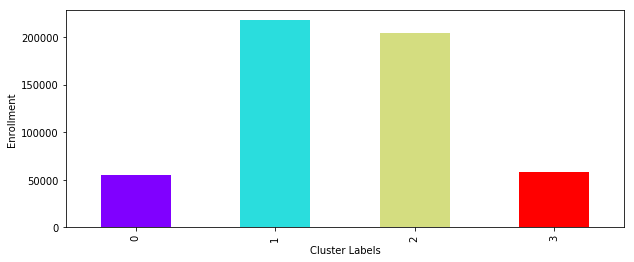

In [39]:
#what makes up the Enrollment of each different cluster?
CE = univ_merged.groupby("Cluster Labels").Enrollment.sum()
ax= CE.plot(kind="bar", figsize=(10,4), color = rainbow)
ax.set_ylabel("Enrollment")
plt.savefig("EnrollmentPerCluster.png")


In [28]:
#cluster 0
univ_merged.loc[univ_merged['Cluster Labels'] == 0, univ_merged.columns[[1] + list(range(5, univ_merged.shape[1]))]]

,University,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ohio State University,-83.028663,0,Café,Coffee Shop,Gym,Sandwich Place,Bar,Pizza Place,Bakery,Clothing Store,Furniture / Home Store,Park


In [33]:
#cluster 1
univ_merged.loc[univ_merged['Cluster Labels'] == 1, univ_merged.columns[[1] + list(range(5, univ_merged.shape[1]))]]

,University,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,University of Central Florida,-81.197125,1,Sandwich Place,Fast Food Restaurant,Pizza Place,Donut Shop,Hotel,Mexican Restaurant,Theater,Sushi Restaurant,Coffee Shop,Burger Joint
4,University of Florida,-82.349013,1,Sandwich Place,Hotel,Fast Food Restaurant,American Restaurant,Liquor Store,Coffee Shop,Chinese Restaurant,Bagel Shop,Theater,Gym
5,Arizona State University,-111.932635,1,Pizza Place,Coffee Shop,Breakfast Spot,Sandwich Place,American Restaurant,Mexican Restaurant,Bar,Burger Joint,Middle Eastern Restaurant,Mediterranean Restaurant
8,Michigan State University,-84.477916,1,College Cafeteria,Sandwich Place,Coffee Shop,Garden,Indian Restaurant,Fast Food Restaurant,Korean Restaurant,Yoga Studio,Pizza Place,Planetarium


In [34]:
#cluster 2
univ_merged.loc[univ_merged['Cluster Labels'] == 2, univ_merged.columns[[1] + list(range(5, univ_merged.shape[1]))]]

,University,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Florida International University,-80.376289,2,Latin American Restaurant,Coffee Shop,Pharmacy,Grocery Store,Chinese Restaurant,Bakery,Park,Burger Joint,Café,South American Restaurant
6,University of Texas at Austin,-97.731956,2,Sandwich Place,American Restaurant,Mexican Restaurant,Hotel,Bar,Coffee Shop,History Museum,Taco Place,Pizza Place,Pool
7,University of Minnesota,-93.237088,2,Bar,Coffee Shop,Pizza Place,Theater,Chinese Restaurant,Café,Asian Restaurant,Sandwich Place,Scenic Lookout,Hotel
9,Indiana University,-84.879569,2,Fast Food Restaurant,American Restaurant,ATM,Burger Joint,Coffee Shop,Sandwich Place,Park,Gas Station,Campground,Bank


In [35]:
#cluster 3
univ_merged.loc[univ_merged['Cluster Labels'] == 3, univ_merged.columns[[1] + list(range(5, univ_merged.shape[1]))]]

,University,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Texas A&M University,-96.352128,3,Bar,Sandwich Place,Pizza Place,Coffee Shop,Fast Food Restaurant,Burger Joint,Mexican Restaurant,Smoothie Shop,Whisky Bar,Park
